In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import files
uploaded = files.upload()

Saving final_data.csv to final_data.csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['final_data.csv']))
df.drop(df.iloc[:, 0:1], inplace=True, axis=1)
df

,Price,Transmission,Power,Engine CC,Fuel_2.0,Class
0,30.619322,5.966102,94.033898,1497.169492,0,Trending
1,18.532143,5.714286,68.571429,1166.142857,0,Trending
2,31.242154,6.164835,89.461538,1537.406593,0,Trending
3,22.100000,5.615385,75.576923,1219.653846,0,Trending
4,47.848370,6.444444,126.111111,1995.777778,0,Trending
...,...,...,...,...,...,...
6087,108.747195,7.853659,207.609756,2304.975610,1,Not trending
6088,43.548516,1.354839,137.774193,2261.193548,0,Not trending
6089,55.200000,6.000000,163.500000,2696.500000,0,Not trending
6090,30.081000,4.000000,110.000000,2254.000000,0,Not trending


In [4]:
# k-NN Classifier
from sklearn.model_selection import train_test_split
x = df.iloc[:, 0:5 ].values 
y = df["Class"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.22)

In [5]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(x, y)
neigh.predict(x_test)

array(['Not trending', 'Not trending', 'Trending', ..., 'Trending',
       'Not trending', 'Not trending'], dtype=object)

In [6]:
Acc = neigh.score(x_test, y_test)
print("Accuracy: ",Acc)

Accuracy:  0.9142431021625652


In [10]:
from google.colab import files
uploaded = files.upload()

Saving Processed_Data.xlsx to Processed_Data (1).xlsx


In [11]:
import io
df = pd.read_excel(io.BytesIO(uploaded['Processed_Data.xlsx']))
df

,Unnamed: 0,Price,Transmission,Power,Engine CC,Fuel_2.0,Male,Female,Unknown,Total,Sale_2
0,0.0,30.619322,5.966102,94.033898,1497.169492,0.0,814172.0,422731.0,56487.0,1293390.0,0.0
1,1.0,18.532143,5.714286,68.571429,1166.142857,0.0,554879.0,631666.0,54057.0,1240602.0,0.0
2,2.0,31.242154,6.164835,89.461538,1537.406593,0.0,483216.0,310604.0,47563.0,841383.0,0.0
3,3.0,22.100000,5.615385,75.576923,1219.653846,0.0,241287.0,312556.0,28004.0,581847.0,0.0
4,4.0,47.848370,6.444444,126.111111,1995.777778,0.0,408016.0,115843.0,29125.0,552984.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
6087,6087.0,108.747195,7.853659,207.609756,2304.975610,1.0,1012.0,150.0,80.0,1242.0,1.0
6088,6088.0,43.548516,1.354839,137.774193,2261.193548,0.0,670.0,482.0,66.0,1218.0,1.0
6089,6089.0,55.200000,6.000000,163.500000,2696.500000,0.0,790.0,247.0,81.0,1118.0,1.0
6090,6090.0,30.081000,4.000000,110.000000,2254.000000,0.0,639.0,416.0,49.0,1104.0,1.0


In [12]:
# k-NN Regressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
x = df.iloc[:,0:5 ].values 
y = df["Total"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.22)

In [13]:
neigh2 = KNeighborsRegressor(n_neighbors=5)
neigh2.fit(x, y)
preds=neigh2.predict(x_test)

[-0.32820784001636083, -0.057334424720820065, 0.04747346474659542, 0.04795984632978967, 0.023466834090009936, 0.06202976078121747, 0.06688487522797104, 0.08010528743075918, 0.09636258121989938, 0.10089565034957515]
[-0.32820784001636083, -0.057334424720820065, 0.04747346474659542, 0.04795984632978967, 0.023466834090009936, 0.06202976078121747, 0.06688487522797104, 0.08010528743075918, 0.09636258121989938, 0.10089565034957515]


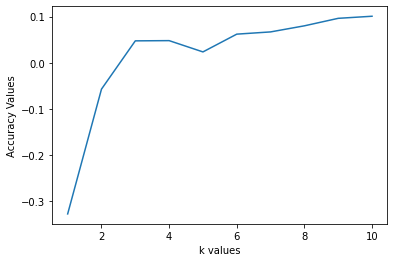

In [14]:
import matplotlib.pyplot as plot
value=[]
for i in range(1,11):
  neigh = KNeighborsRegressor(n_neighbors=i)
  neigh.fit(x_train, y_train)
  xy_acc = neigh.score(x_test,y_test)
  value = value + [xy_acc]
print(value)
print(value)
k_values = [1,2,3,4,5,6,7,8,9,10]
plot.plot(k_values,value)
plot.xlabel("k values")
plot.ylabel("Accuracy Values")
plot.show()

In [15]:
Acc2 = neigh2.score(x_test, y_test)
print("Accuracy: ",Acc2)

Accuracy:  0.42513288647669556
